# Trust Model Training Notebook - SmartLead+
This notebook trains a Random Forest model to assign trust scores to leads based on engineered features.

This notebook trains a Random Forest model to classify business leads as "trustworthy" or "not trustworthy"
based on features like domain, HTTPS usage, email structure, and field completeness.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import joblib


In [34]:

# Load Processed Data
df = pd.read_csv("../data/processed_leads.csv")
df.head()


,Name,Title,Company,Email,Website,Industry,CompanySize,Revenue,BusinessType,ProductCategory,EmailLength,WebsiteHTTPS,MissingFields,HasDisposableDomain,TLD,EmailCompanyMatch
0,Farah Naaz,CEO,ClickBait Inc.,NaN,https://tempmail.co,FinTech,20,1M-5M,B2B,NaN,0,1,2,0,co,0
1,Simran Kaur,Recruiter,SpamForge,simrankaur@gmail.com,http://gmail.site,HR,20,NaN,B2C,Analytics,20,0,1,0,site,0
2,Aarav Mehta,Developer,NopeLabs,aaravmehta@protonmail.com,https://protonmail.xyz,HealthTech,20,1M-5M,B2B,CRM,25,1,0,0,xyz,0
3,Manav Saxena,CEO,HexTech,manavsaxena@globex.com,https://globex.com,HR,5,>10M,B2B2C,NaN,22,1,1,0,com,0
4,Aditya Khanna,CEO,ClickBait Inc.,adityakhanna@tempmail.com,http://tempmail.co,HealthTech,5,1M-5M,Unknown,HR Software,25,0,0,1,co,0


In [35]:

# Define Features and Target
features = ['EmailLength', 'WebsiteHTTPS', 'MissingFields', 'HasDisposableDomain', 'EmailCompanyMatch']
X = df[features]
y = df['Label'] if 'Label' in df.columns else None  # Placeholder if you later add labels manually

# Temporarily generate labels for testing (remove this block if labels are present)
if y is None:
    y = (df['WebsiteHTTPS'] & (df['HasDisposableDomain'] == 0) & (df['MissingFields'] <= 1)).astype(int)


In [36]:

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:

# Evaluate Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



C:\Users\kmush\AppData\Local\Temp\ipykernel_21952\2113065606.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="Blues_d")


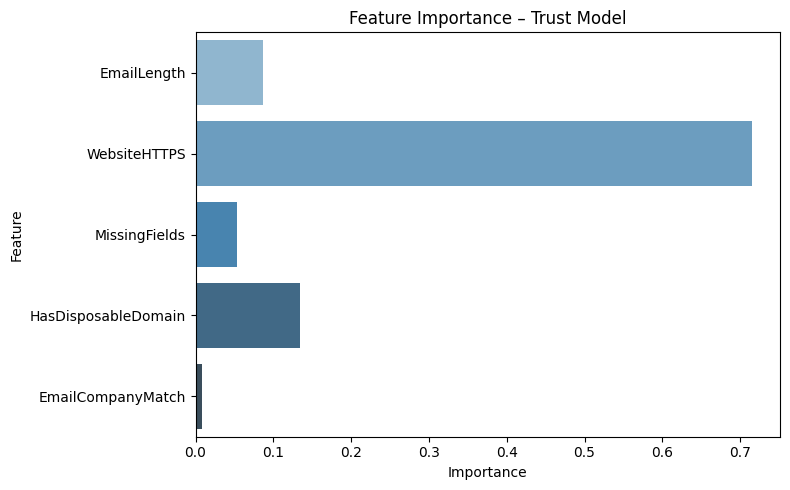

In [39]:
# Visualizing feature importance
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names, palette="Blues_d")
plt.title("Feature Importance – Trust Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [40]:

# Save the Model
joblib.dump(model, "../models/trust_model.pkl")
print(" Model saved as trust_model.pkl")


 Model saved as trust_model.pkl
